In [43]:
# data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import hist
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# prettify
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Data Dictionary
VariableDefinitionKey 
**survival**: Survival 0 = No, 1 = Yes <br>
**pclass**: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
**sex**: Sex Age Age in years <br>
**sibsp**: # of siblings / spouses aboard the Titanic <br>
**parch**: # of parents / children aboard the Titanic <br>
**ticket**: Ticket number <br>
**fare**: Passenger fare <br>
**cabin**: Cabin number <br>
**embarked**: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton<br>
<br><br>

### Variable Notes
**pclass**: A proxy for socio-economic status (SES)<br>
* 1st = Upper<br>
* 2nd = Middle<br>
* 3rd = Lower<br>

**age**: Age<br> 
Fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>

**sibsp**: The dataset defines family relations in this way...<br>
* **Sibling** = brother, sister, stepbrother, stepsister<br>
* **Spouse** = husband, wife (mistresses and fiancés were ignored)<br>

**parch**: The dataset defines family relations in this way...<br>
* **Parent** = mother, father<br>
* **Child** = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

### Load Data & Combine

In [44]:
dat={}

dat["train"]=pd.read_csv('train.csv')
dat["test"]=pd.read_csv('test.csv')

### Add Data

In [45]:
for s in dat:
    dat[s]['Title'] = dat[s].Name.str.extract(' ([A-Za-z]+)\.', expand=False)

### Drop useless data

In [46]:
for s in dat:
    dat[s] = dat[s].drop(['Ticket', 'Cabin'], axis=1)
    
for s in dat:
    dat[s].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


### Attempt to fill in missing data

<br>

#### Start by filling in the missing ages by using their title
#### Then fill in the fare with just a mean
#### Then fixed embarked


In [47]:
for s in dat:
    meanDict={}
    for title in dat[s]['Title'].unique():
        ages=dat[s]["Age"].where(dat[s]['Title']==title)
        mean=np.nanmean(ages)
        meanDict[title]=mean
    
    # break up dat[s] set
    dat[s]["Age"].fillna(-1,inplace=True)
    missingAges = dat[s][dat[s]['Age']<0]
    dat[s] = dat[s][(dat[s]['Age']>=0)]

    # recombine everything
    for title in meanDict:
        titleAges = missingAges[missingAges['Title']==title]
        titleAges['Age'] =  meanDict[title]
        dat[s] = pd.concat([dat[s],titleAges])

    
    # if there are any straggling ages, such as titles with no ages at all, do a mean
    mean=np.nanmean(dat[s]["Age"])
    dat[s]["Age"].fillna(mean, inplace=True)
    
    # for the fare, we are just going to do a mean across all tickets
    mean=np.nanmean(dat[s]["Fare"])
    dat[s]["Fare"]=dat[s]["Fare"].fillna(mean)
    
    # For Embarked we will use the ‘mode’ to replace the null values.
    mode = dat[s]['Embarked'].mode()
    
    # mode refused to go in so I hard coded it
    dat[s]['Embarked'].fillna('S', inplace=True)
    print("What columns have null values in", s)
    dat[s].isnull().any()
    

What columns have null values in train


C:\Users\agust\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
dtype: bool

C:\Users\agust\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


What columns have null values in test


PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
dtype: bool

## Apply some normalization to the titles

,Title,Survived
0,Bourgeoisie,0.347826
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651


Women, Little Girls, Little Boys, The Rich, then the men


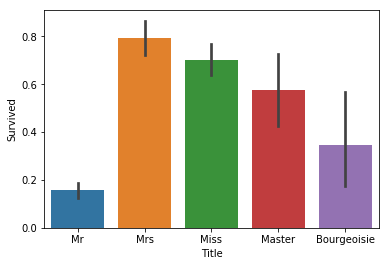

In [48]:
for s in dat:
    dat[s]['Title'] = dat[s]['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Bourgeoisie')

    dat[s]['Title'] = dat[s]['Title'].replace('Mlle', 'Miss')
    dat[s]['Title'] = dat[s]['Title'].replace('Ms', 'Miss')
    dat[s]['Title'] = dat[s]['Title'].replace('Mme', 'Mrs')
    
dat['train'][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

sns.barplot(x='Title', y='Survived', data=dat['train'])
print("Women, Little Girls, Little Boys, The Rich, then the men")

### Drop Names now that we don't need them

In [49]:
for s in dat:
    # drop useless data
    dat[s] = dat[s].drop(['Name'], axis=1)
    dat[s].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


### Some Stats

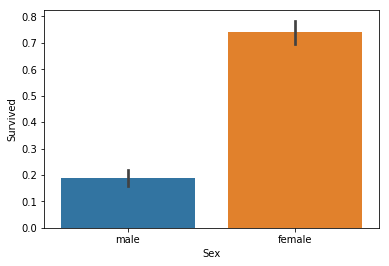

In [50]:
sns.barplot(x='Sex', y='Survived', data=dat['train'])

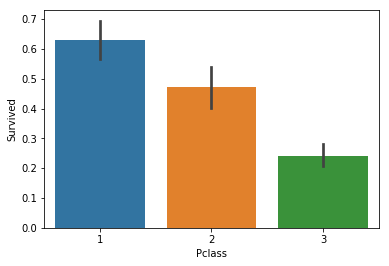

In [51]:
sns.barplot(x='Pclass', y='Survived', data=dat['train'])

### Embark matters
As we can see, even the embarked location matters a bit.  So we'll keep it

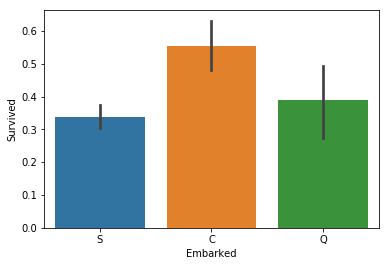

In [52]:
sns.barplot(x='Embarked', y='Survived', data=dat['train'])

### Lets create a new feature called "alone"

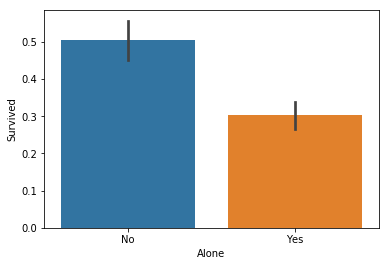

In [53]:
for s in dat:
    dat[s]['relatives'] = dat[s]['SibSp'] + dat[s]['Parch']
    dat[s].loc[dat[s]['relatives'] > 0, 'Alone'] = 'No'
    dat[s].loc[dat[s]['relatives'] == 0, 'Alone'] = 'Yes'

sns.barplot(x='Alone', y='Survived', data=dat['train'])

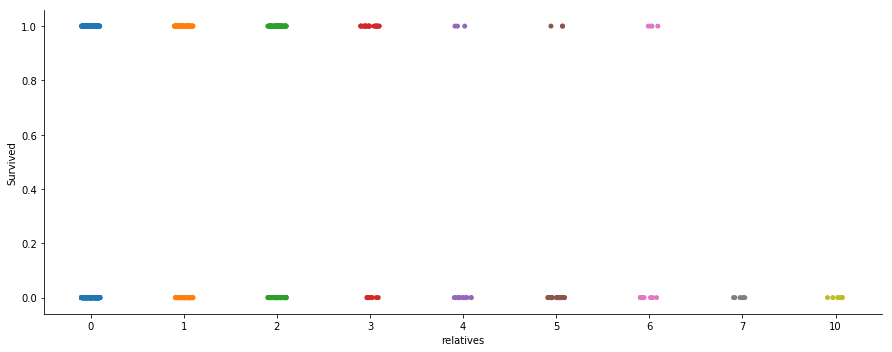

In [54]:
axes = sns.catplot('relatives','Survived', 
                      data=dat['train'], aspect = 2.5, );

In [55]:
import statsmodels.formula.api as sm
lm = sm.ols(formula='Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Title', data=dat['train']).fit()
#lm.summary()

### Let's convert some strings to numbers
<br>
Some of the classifiers require this

In [56]:
for s in dat:
    dat[s]['Sex'].replace(['male','female'],[0,1],inplace=True)
    dat[s]['Title'].replace(['Bourgeoisie','Mrs','Miss','Master','Mr'],[5,4,3,2,1],inplace=True)
    dat[s]['Embarked'].replace(['C','Q','S'],[3,2,1],inplace=True)

dat['train'].head()
dat['test'].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,Alone
0,1,0,3,0,22.0,1,0,7.2500,1,1,1,No
1,2,1,1,1,38.0,1,0,71.2833,3,4,1,No
2,3,1,3,1,26.0,0,0,7.9250,1,3,0,Yes
3,4,1,1,1,35.0,1,0,53.1000,1,4,1,No
4,5,0,3,0,35.0,0,0,8.0500,1,1,0,Yes


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,Alone
0,892,3,0,34.5,0,0,7.8292,2,1,0,Yes
1,893,3,1,47.0,1,0,7.0000,1,4,1,No
2,894,2,0,62.0,0,0,9.6875,2,1,0,Yes
3,895,3,0,27.0,0,0,8.6625,1,1,0,Yes
4,896,3,1,22.0,1,1,12.2875,1,4,2,No


### Let's split up the training set

In [57]:
X_train = dat['train'].drop("Survived",axis=1)
Y_train = dat['train']["Survived"]
X_test  = dat['test'].copy()
X_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,Alone
0,892,3,0,34.5,0,0,7.8292,2,1,0,Yes
1,893,3,1,47.0,1,0,7.0000,1,4,1,No
2,894,2,0,62.0,0,0,9.6875,2,1,0,Yes
3,895,3,0,27.0,0,0,8.6625,1,1,0,Yes
4,896,3,1,22.0,1,1,12.2875,1,4,2,No
5,897,3,0,14.0,0,0,9.2250,1,1,0,Yes
6,898,3,1,30.0,0,0,7.6292,2,3,0,Yes
7,899,2,0,26.0,1,1,29.0000,1,1,2,No
8,900,3,1,18.0,0,0,7.2292,3,4,0,Yes
9,901,3,0,21.0,2,0,24.1500,1,1,2,No


In [58]:
for s in dat:
    print("What columns have null values?")
    dat[s].isnull().any()


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(X_test)

print("Logistic Regression Score ------------------------")
logreg.score(X_train, Y_train)

What columns have null values?


PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
relatives      False
Alone          False
dtype: bool

What columns have null values?


PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
relatives      False
Alone          False
dtype: bool

C:\Users\agust\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Yes'

In [59]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred2 = decision_tree.predict(X_test)

print("Decision Tree Score ------------------------")
decision_tree.score(X_train, Y_train)

ValueError: could not convert string to float: 'No'

# Perfect!

In [ ]:
submission = pd.DataFrame({
        "PassengerId": dat['test']["PassengerId"],
        "Survived": Y_pred1
    })
submission.to_csv('submission_log.csv', index=False)

submission = pd.DataFrame({
        "PassengerId": dat['test']["PassengerId"],
        "Survived": Y_pred2
    })
submission.to_csv('submission.csv', index=False)